<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/master/bitcoinsmall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,la;q=0.8,hi;q=0.7,fr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/1346/330249/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556735469&Signature=VqITXp07BNpuXbH9lrJLY99q9G%2Fr55wGztM7k%2FglQIbJMgF3dz5OBVUVhOT6bfdn69ps3bBXKs8HZfaMRuW1XS6L54m9Y6UxDik%2FGvA73oJwwEDnbAIPBt6wtCzWW4CExWo7s1IvditJVBO%2FYRFn6vwMXNXuU9tx2iFyg6c6mBgtEEmaJ2%2FMu4BhnyZb8FB5YKPIhhj%2Fw%2FtbWtQ3f1hiyhi37zp2LvJR6iA1P4exFf2DYpMLiTkQeFEW7LOy32sF2HYboIkIHUzL8lcnCSSL5JFHTZw8RIYr7d1ZgZQcfgSOkGnJXOdyqe40JA8YmaIARddC%2BsV7mTtVnjF2C7%2BzPA%3D%3D" -O "coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip" -c

--2019-04-28 18:36:43--  https://storage.googleapis.com/kaggle-datasets/1346/330249/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556735469&Signature=VqITXp07BNpuXbH9lrJLY99q9G%2Fr55wGztM7k%2FglQIbJMgF3dz5OBVUVhOT6bfdn69ps3bBXKs8HZfaMRuW1XS6L54m9Y6UxDik%2FGvA73oJwwEDnbAIPBt6wtCzWW4CExWo7s1IvditJVBO%2FYRFn6vwMXNXuU9tx2iFyg6c6mBgtEEmaJ2%2FMu4BhnyZb8FB5YKPIhhj%2Fw%2FtbWtQ3f1hiyhi37zp2LvJR6iA1P4exFf2DYpMLiTkQeFEW7LOy32sF2HYboIkIHUzL8lcnCSSL5JFHTZw8RIYr7d1ZgZQcfgSOkGnJXOdyqe40JA8YmaIARddC%2BsV7mTtVnjF2C7%2BzPA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52300764 (50M) [application/zip]
Saving to: ‘coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip’

coinbaseUSD_1-min_d 100%[===================>]

In [2]:
!ls

coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip  sample_data


In [3]:
!unzip coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip

Archive:  coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv.zip
  inflating: coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv  


In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error


Using TensorFlow backend.


In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += y_true[i+1] - y_true[i]
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [6]:
coinbase = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
coinbase.describe()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [0]:
a = coinbase["Close"][800000:].fillna(method="backfill")

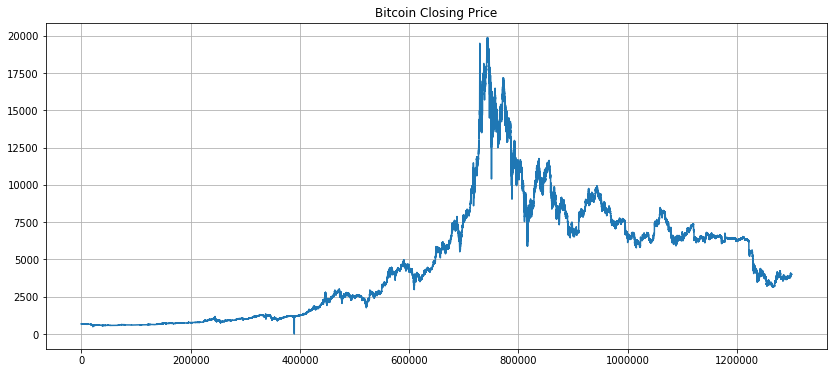

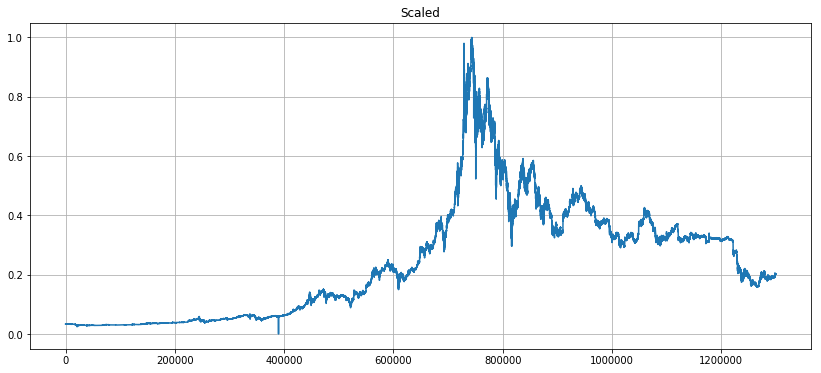

In [8]:
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [9]:
timestep = 100
X = []
y = []
for i in range(timestep, len(close_priceSC)):
    X.append(close_priceSC[i-timestep:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(1299660, 100) (1299660,)


In [0]:
X_train = X[:1000000,:]
X_test = X[1000000:,:]

y_train = y[:1000000]
y_test = y[1000000:]


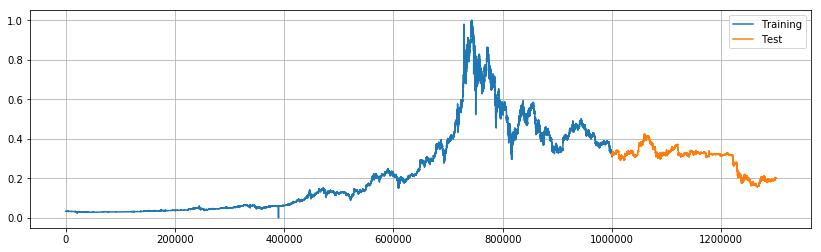

In [11]:
plt.figure(figsize=(14,4))
plt.plot(range(1000000),y_train)
plt.plot(range(1000000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()


In [0]:
X_train = X_train.reshape(-1, timestep,1)
X_test = X_test.reshape(-1,timestep,1)

In [13]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=256))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=5, batch_size=2048)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1000000/1000000 [==============================] - 359s 359us/step - loss: 0.0170
Epoch 2/5
1000000/1000000 [==============================] - 355s 355us/step - loss: 0.0114
Epoch 3/5
1000000/1000000 [==============================] - 354s 354us/step - loss: 0.0103
Epoch 4/5
1000000/1000000 [==============================] - 352s 352us/step - loss: 0.0101
Epoch 5/5
1000000/1000000 [==============================] - 352s 352us/step - loss: 0.0099
CPU times: user 33min 55s, sys: 4min 26s, total: 38min 21s
Wall time: 29min 34s


In [16]:
%%time
y_pred = regressor.predict(X_test)

CPU times: user 45min 54s, sys: 4min 4s, total: 49min 58s
Wall time: 30min 44s


In [20]:
print("Mean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}".format(mean_absolute_error(y_test, y_pred),systematic_mean_absolute_percentage_error(y_test, y_pred), mean_absolute_scaled_error(y_test, y_pred)))

Mean absolute error 0.0028652380226750823
Systematic mean absolute percentage error 0.8990830069651855 
Mean_absolute_scaled_error -0.025008716330657536


Text(0, 0.5, 'Price')

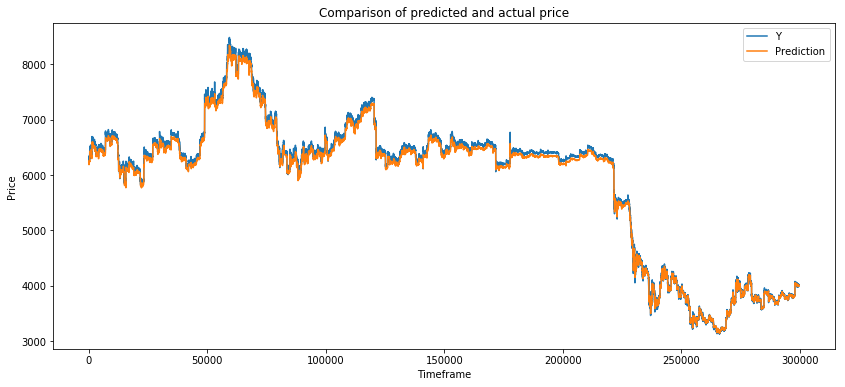

In [21]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison of predicted and actual price")
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")